This notebook is created for the Capstone Project required in Coursera course.

In [90]:
!pip install wheel
!pip install pipwin
!pipwin install numpy
!pipwin install pandas
!pipwin install shapely
!pipwin install gdal
!pipwin install fiona
!pipwin install pyproj
!pipwin install six
!pipwin install rtree
!pipwin install geopandas

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pipwin/command.py:66: UserWarning: Found

In [91]:
!pip install geopy

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [92]:
!pip install seaborn

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [103]:
import pandas as pd
import numpy as np
from geopy import Nominatim
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

from pandas import json_normalize

In [7]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


- A description of the problem and a discussion of the background. (15 marks)

- A description of the data and how it will be used to solve the problem. (15 marks)

# Introduction/Business Problem

Assume you will be working in IBM Istanbul, the most famous city in Turkey. Where should you be living so that you will be close to the office, your place is close to popular places around and cost is optimized?
I will try to answer this problem by looking at the districts data of Istanbul, foursquare popularity score of places nearby the locations and annual household income of the houses nearby.

The output of this work can be helpful to individuals started working at IBM Istanbul and didn't live there before. This hopefully help people to pick where to live in an unknown city where they go for work.

# Data

- The district data will come from https://en.wikipedia.org/wiki/List_of_districts_of_Istanbul along with the annual household income.

- There is so much traffic in Istanbul, so we have to find the districts that are near the IBM Istanbul office. First of all we should investigate the districts and how close they are to the office.

- The data for popular places will come from the foursquare API.

- Then we will select a district according to closeness and annual income factor. Then we will explore the places that it has and see if it contains good places to socialize with foursquare data.

In [8]:
!pip install geocoder

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 98 kB 11.9 MB/s eta 0:00:01


In [9]:
!pip install folium

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 94 kB 7.7 MB/s  eta 0:00:01


In [10]:
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page
import pandas as pd
import numpy as np
import geocoder # import geocoder
import folium
# import k-means from clustering stage
from sklearn.cluster import KMeans



# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [11]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_districts_of_Istanbul').text
soup=BeautifulSoup(source,'html5lib')

In [12]:
tables = soup.find_all('table')
print(soup.title)
from IPython.display import display_html
tab = str(tables[0])
display_html(tab,raw=True)

<title>List of districts of Istanbul - Wikipedia</title>


District,Population (2020),Area (km²),Density (per km²),Mensual household income TL(USD),Annual household income TL(USD)
Adalar,"16,033",11.05,"1,451",6.652₺ (918$),"79.821₺ (10,978$)"
Arnavutköy,"296,709",450.35,659,2.030₺ (279$),"24.360₺ (3,350$)"
Ataşehir,"422,594",25.23,"16,750",6.577₺ (904$),"78.924₺ (10,854$)"
Avcılar,"436,897",42.01,"10,400",3.662₺ (503$),"43.938₺ (6,064$)"
Bağcılar,"737,206",22.36,"32,970",3.197₺ (441$),"38.367₺ (5,295$)"
Bahçelievler,"592,371",16.62,"35,642",4.674₺ (645$),"56.088₺ (7,741$)"
Bakırköy,"226,229",29.64,"7,633","8.845₺ (1,220$)","106.140₺ (14,650$)"
Başakşehir,"469,924",104.30,"4,506",4.513₺ (622$),"54.152₺ (7,474$)"
Bayrampaşa,"269,950",9.61,"28,091",3.480₺ (480$),"41.762₺ (5,764$)"
Beşiktaş,"176,513",18.01,"9,801","10.560₺ (1,457$)","126.720₺ (17,490$)"


First of all we are getting the information about districts.

For each district we will get population, area, density, mensual household income TL(USD) and annual household income TL(USD) information.

In [13]:
table_contents = []
table = soup.find('table')
column_count = 0
cell = {}
for row in table.findAll('td'):
#   name of the district
    if row.a != None: 
        column_count = 0
        cell_content = str(row.a.text)
        cell['District'] = cell_content
#   numerical values
    else:
        column_count = column_count + 1
        cell_content = str(row)[4:-6]
        if column_count == 1:
            cell['Population'] = cell_content
        elif column_count == 2:
            cell['Area'] = cell_content
        elif column_count == 3:
            cell['Density'] = cell_content
        elif column_count == 4:
            cell['Mensual household income TL(USD)'] = cell_content
        else:
            cell['Annual household income TL(USD)'] = cell_content
            table_contents.append(cell)
            cell = {}
df = pd.DataFrame(table_contents)
df.head()

,District,Population,Area,Density,Mensual household income TL(USD),Annual household income TL(USD)
0,Adalar,"16,033",11.05,"1,451",6.652₺ (918$),"79.821₺ (10,978$)"
1,Arnavutköy,"296,709",450.35,659,2.030₺ (279$),"24.360₺ (3,350$)"
2,Ataşehir,"422,594",25.23,"16,750",6.577₺ (904$),"78.924₺ (10,854$)"
3,Avcılar,"436,897",42.01,"10,400",3.662₺ (503$),"43.938₺ (6,064$)"
4,Bağcılar,"737,206",22.36,"32,970",3.197₺ (441$),"38.367₺ (5,295$)"


In [14]:
df.tail()

,District,Population,Area,Density,Mensual household income TL(USD),Annual household income TL(USD)
36,Ümraniye,"713,803",45.31,"15,754",3.637₺ (502$),"43.641₺ (6,023$)"
37,Üsküdar,"520,771",35.33,"14,740",6.987₺ (964$),"83.839₺ (11,572$)"
38,Zeytinburnu,"283,657",11.59,"24,474",3.644₺ (502$),6.036₺ (6.036$)
39,NaN,NaN,NaN,NaN,NaN,<b>Europe (25 districts)</b>
40,NaN,NaN,NaN,NaN,NaN,"<b>9,959,793</b>"


As you can see the last two rows have NaN values, I have detected this in the original Wiki page, and as we check here it is obvious.

Let's drop them.

In [15]:
df.dropna(how='any',axis=0, inplace=True)
df.tail()

,District,Population,Area,Density,Mensual household income TL(USD),Annual household income TL(USD)
34,Şişli,"266,793",10.71,"24,911","7.822₺ (1,079$)","93.864₺ (12,955$)"
35,Tuzla,"273,608",123.63,"2,213",3.407₺ (470$),"40.884₺ (5,643$)"
36,Ümraniye,"713,803",45.31,"15,754",3.637₺ (502$),"43.641₺ (6,023$)"
37,Üsküdar,"520,771",35.33,"14,740",6.987₺ (964$),"83.839₺ (11,572$)"
38,Zeytinburnu,"283,657",11.59,"24,474",3.644₺ (502$),6.036₺ (6.036$)


Now, I want to visualize the districts, first of all I need the latitude and longitude information of Istanbul itself.

As I have found online istanbul latitude = 41.0100, istanbul longitude = 28.9603

In [16]:
ist_lat = 41.0100
ist_long = 28.9603

For getting the latitudes and longitudes of each district let's form an address column.

In [17]:
df['Address'] = df['District'] + ", Istanbul, Turkey"

In [18]:
df.head()

,District,Population,Area,Density,Mensual household income TL(USD),Annual household income TL(USD),Address
0,Adalar,"16,033",11.05,"1,451",6.652₺ (918$),"79.821₺ (10,978$)","Adalar, Istanbul, Turkey"
1,Arnavutköy,"296,709",450.35,659,2.030₺ (279$),"24.360₺ (3,350$)","Arnavutköy, Istanbul, Turkey"
2,Ataşehir,"422,594",25.23,"16,750",6.577₺ (904$),"78.924₺ (10,854$)","Ataşehir, Istanbul, Turkey"
3,Avcılar,"436,897",42.01,"10,400",3.662₺ (503$),"43.938₺ (6,064$)","Avcılar, Istanbul, Turkey"
4,Bağcılar,"737,206",22.36,"32,970",3.197₺ (441$),"38.367₺ (5,295$)","Bağcılar, Istanbul, Turkey"


Then, let's feed this address column to our locator and get location, latitude and longitude information.

In [19]:
locator = Nominatim(user_agent="myGeocoder")
df['Location'] = df['Address'].map(locator.geocode)

In [20]:
df['Latitude'] = [loc.latitude for loc in df['Location']]
df['Longitude'] = [loc.longitude for loc in df['Location']]

In [21]:
df.head()

,District,Population,Area,Density,Mensual household income TL(USD),Annual household income TL(USD),Address,Location,Latitude,Longitude
0,Adalar,"16,033",11.05,"1,451",6.652₺ (918$),"79.821₺ (10,978$)","Adalar, Istanbul, Turkey","(Adalar, İstanbul, Marmara Bölgesi, Türkiye, (...",40.876259,29.091027
1,Arnavutköy,"296,709",450.35,659,2.030₺ (279$),"24.360₺ (3,350$)","Arnavutköy, Istanbul, Turkey","(Arnavutköy, İstanbul, Marmara Bölgesi, Türkiy...",41.184471,28.741245
2,Ataşehir,"422,594",25.23,"16,750",6.577₺ (904$),"78.924₺ (10,854$)","Ataşehir, Istanbul, Turkey","(Ataşehir, İstanbul, Marmara Bölgesi, Türkiye,...",40.984749,29.106720
3,Avcılar,"436,897",42.01,"10,400",3.662₺ (503$),"43.938₺ (6,064$)","Avcılar, Istanbul, Turkey","(Avcılar, İstanbul, Marmara Bölgesi, Türkiye, ...",40.980135,28.717547
4,Bağcılar,"737,206",22.36,"32,970",3.197₺ (441$),"38.367₺ (5,295$)","Bağcılar, Istanbul, Turkey","(Bağcılar, İstanbul, Marmara Bölgesi, Türkiye,...",41.033899,28.857898


So, let's now visualize what we have.

- I want to pin the districts location, that's why we need Latitude and Longitude columns.
- I want to show the name of the district in a pop-up on the pins so we need District column.
- Also I want to pin the locaion of IBM Turkey.

That is all for the first visual, let's see it.

Let's put IBM Turkey location pin in to the map.

The latitude and longitude of IBM Turkey is 41.08370476320405, 29.011838166676558.

In [22]:
ibm_turkey_lat = 41.08370476320405
ibm_turkey_long = 29.011838166676558

In [23]:
istanbul_district_map = folium.Map(location=[ist_lat, ist_long], zoom_start=10) 

folium.CircleMarker(
    [ist_lat, ist_long],
    radius=3,
    popup='İstanbul',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(istanbul_district_map)

folium.Marker(
    [ibm_turkey_lat, ibm_turkey_long],
    popup='IBM Turkey',
    icon=folium.Icon(color='black')
    ).add_to(istanbul_district_map)


for lat, lng, dist in zip(df.Latitude, df.Longitude, df.District):
    label = '{}'.format(dist)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=folium.Popup(label, parse_html=True),
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(istanbul_district_map)

# display map


istanbul_district_map

Now, I would like to get the distances from each district to IBM Turkey. 

I can use a formula to calculate the air distance however I would like to get the earth distance.

I will use Haversine formula to get the distance in "km"s and will add a column to the dataframe.

In [24]:
# define the function to get the distance from a given district to IBM Turkey
def distance(lat1, lon1, lat2, lon2):
  p = 0.017453292519943295    # Math.PI / 180
  a = 0.5 - math.cos((lat2 - lat1) * p)/2 + math.cos(lat1 * p) * math.cos(lat2 * p) * (1 - math.cos((lon2 - lon1) * p))/2

  return 12742 * math.asin(math.sqrt(a)); # 2 * R; R = 6371 km

In [25]:
df['Distance to IBM Turkey (km)'] = df.apply(lambda x: distance(x['Latitude'], x['Longitude'], ibm_turkey_lat, ibm_turkey_long), axis=1)

Let's examine the Distance to IBM Turkey (km) column so that we can select a radius for picking an area around IBM Turkey, and filter out some of the districts.

In [26]:
df['Distance to IBM Turkey (km)'].describe()

count    39.000000
mean     19.239291
std      13.797371
min       3.296599
25%       9.355007
50%      14.045062
75%      25.810472
max      64.125610
Name: Distance to IBM Turkey (km), dtype: float64

Okay so, standard deviation is close to the mean, that means I don't want to use mean as the data is not cumulated around it, it varies heavily.

So let's look at a bar graph that gives the values to us in a visual manner.

Then, I will select a radius for our district to be in.

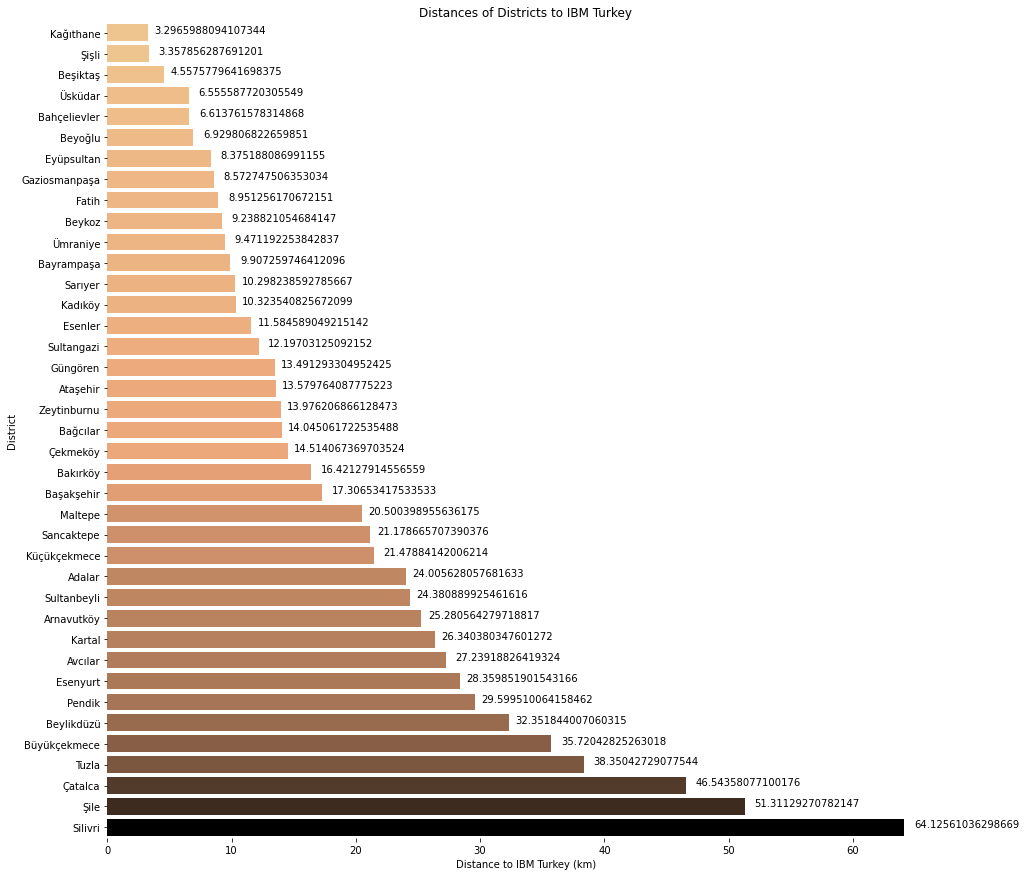

In [27]:
df_sorted = df.sort_values('Distance to IBM Turkey (km)', ascending = True, inplace = False)
df_sorted.reset_index(inplace=True)

f, ax = plt.subplots(figsize=(15, 15))

plt.title("Distances of Districts to IBM Turkey")
plt.ylabel("Districts")
plt.xlabel("Distances (km)")

norm = plt.Normalize(df_sorted["Distance to IBM Turkey (km)"].values.min(), df_sorted["Distance to IBM Turkey (km)"].values.max())
colors = plt.cm.copper_r(norm(df_sorted["Distance to IBM Turkey (km)"])) 

g = sns.barplot( x="Distance to IBM Turkey (km)", y="District", data=df_sorted, palette=colors)
sns.despine(left=True, bottom=True)

for index, row in df_sorted.iterrows():
    g.text(row['Distance to IBM Turkey (km)']+5, index, row['Distance to IBM Turkey (km)'], color='black', ha="center")
    

plt.show()

As we can see here we definitely don't want to stay in "Silivri" :)

So let's pick 15 km as the radius of the area centered at IBM Istanbul. I have decided this by looking at the number of districts in each radius as integers. 15 seems reasonable enough for eliminating some of the districts by not going too far, pan intended :)



In [28]:
df.head()

,District,Population,Area,Density,Mensual household income TL(USD),Annual household income TL(USD),Address,Location,Latitude,Longitude,Distance to IBM Turkey (km)
0,Adalar,"16,033",11.05,"1,451",6.652₺ (918$),"79.821₺ (10,978$)","Adalar, Istanbul, Turkey","(Adalar, İstanbul, Marmara Bölgesi, Türkiye, (...",40.876259,29.091027,24.005628
1,Arnavutköy,"296,709",450.35,659,2.030₺ (279$),"24.360₺ (3,350$)","Arnavutköy, Istanbul, Turkey","(Arnavutköy, İstanbul, Marmara Bölgesi, Türkiy...",41.184471,28.741245,25.280564
2,Ataşehir,"422,594",25.23,"16,750",6.577₺ (904$),"78.924₺ (10,854$)","Ataşehir, Istanbul, Turkey","(Ataşehir, İstanbul, Marmara Bölgesi, Türkiye,...",40.984749,29.106720,13.579764
3,Avcılar,"436,897",42.01,"10,400",3.662₺ (503$),"43.938₺ (6,064$)","Avcılar, Istanbul, Turkey","(Avcılar, İstanbul, Marmara Bölgesi, Türkiye, ...",40.980135,28.717547,27.239188
4,Bağcılar,"737,206",22.36,"32,970",3.197₺ (441$),"38.367₺ (5,295$)","Bağcılar, Istanbul, Turkey","(Bağcılar, İstanbul, Marmara Bölgesi, Türkiye,...",41.033899,28.857898,14.045062


In [29]:
df_filtered = df[df['Distance to IBM Turkey (km)'] < 15]

In [30]:
df_filtered_sorted = df_filtered.sort_values('Distance to IBM Turkey (km)', ascending = True, inplace = False)

In [31]:
df_filtered_sorted.reset_index(inplace = True)

In [32]:
df_filtered_sorted.drop('index', 1, inplace = True)

In [33]:
df_filtered_sorted.head()

,District,Population,Area,Density,Mensual household income TL(USD),Annual household income TL(USD),Address,Location,Latitude,Longitude,Distance to IBM Turkey (km)
0,Kağıthane,"442,415",14.87,"29,752",4.188₺ (578$),"50.260₺ (6,937$)","Kağıthane, Istanbul, Turkey","(Kağıthane, İstanbul, Marmara Bölgesi, Türkiye...",41.085980,28.972621,3.296599
1,Şişli,"266,793",10.71,"24,911","7.822₺ (1,079$)","93.864₺ (12,955$)","Şişli, Istanbul, Turkey","(Şişli, İstanbul, Marmara Bölgesi, Türkiye, (4...",41.061273,28.985020,3.357856
2,Beşiktaş,"176,513",18.01,"9,801","10.560₺ (1,457$)","126.720₺ (17,490$)","Beşiktaş, Istanbul, Turkey","(Beşiktaş, İstanbul, Marmara Bölgesi, Türkiye,...",41.042847,29.007528,4.557578
3,Üsküdar,"520,771",35.33,"14,740",6.987₺ (964$),"83.839₺ (11,572$)","Üsküdar, Istanbul, Turkey","(Üsküdar, İstanbul, Marmara Bölgesi, Türkiye, ...",41.024905,29.017528,6.555588
4,Bahçelievler,"592,371",16.62,"35,642",4.674₺ (645$),"56.088₺ (7,741$)","Bahçelievler, Istanbul, Turkey","(Bahçelievler Mahallesi, Üsküdar, İstanbul, Ma...",41.053384,29.079710,6.613762


In [34]:
istanbul_district_map_filtered = folium.Map(location=[ist_lat, ist_long], zoom_start=10) 

folium.CircleMarker(
    [ist_lat, ist_long],
    radius=3,
    popup='İstanbul',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(istanbul_district_map_filtered)

folium.Marker(
    [ibm_turkey_lat, ibm_turkey_long],
    popup='IBM Turkey',
    icon=folium.Icon(color='black')
    ).add_to(istanbul_district_map_filtered)


for lat, lng, dist in zip(df_filtered_sorted.Latitude, df_filtered_sorted.Longitude, df_filtered_sorted.District):
    label = '{}'.format(dist)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=folium.Popup(label, parse_html=True),
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(istanbul_district_map_filtered)

# display map
istanbul_district_map_filtered

Here we have got 20 districts, I wonder if I divide this districts into 5 different clusters, how will they be formed.

So let's apply K-means clustering to these points and see what we get.

In [35]:
df_filtered_sorted.head()

,District,Population,Area,Density,Mensual household income TL(USD),Annual household income TL(USD),Address,Location,Latitude,Longitude,Distance to IBM Turkey (km)
0,Kağıthane,"442,415",14.87,"29,752",4.188₺ (578$),"50.260₺ (6,937$)","Kağıthane, Istanbul, Turkey","(Kağıthane, İstanbul, Marmara Bölgesi, Türkiye...",41.085980,28.972621,3.296599
1,Şişli,"266,793",10.71,"24,911","7.822₺ (1,079$)","93.864₺ (12,955$)","Şişli, Istanbul, Turkey","(Şişli, İstanbul, Marmara Bölgesi, Türkiye, (4...",41.061273,28.985020,3.357856
2,Beşiktaş,"176,513",18.01,"9,801","10.560₺ (1,457$)","126.720₺ (17,490$)","Beşiktaş, Istanbul, Turkey","(Beşiktaş, İstanbul, Marmara Bölgesi, Türkiye,...",41.042847,29.007528,4.557578
3,Üsküdar,"520,771",35.33,"14,740",6.987₺ (964$),"83.839₺ (11,572$)","Üsküdar, Istanbul, Turkey","(Üsküdar, İstanbul, Marmara Bölgesi, Türkiye, ...",41.024905,29.017528,6.555588
4,Bahçelievler,"592,371",16.62,"35,642",4.674₺ (645$),"56.088₺ (7,741$)","Bahçelievler, Istanbul, Turkey","(Bahçelievler Mahallesi, Üsküdar, İstanbul, Ma...",41.053384,29.079710,6.613762


In [36]:
k = 5
istanbul_clustering = df_filtered_sorted.drop(['District','Population','Area','Density', 'Mensual household income TL(USD)', 'Annual household income TL(USD)', 'Address', 'Location', 'Latitude', 'Longitude'],1)
kmeans = KMeans(n_clusters = k,random_state=0).fit(istanbul_clustering)
kmeans.labels_
try:
    df_filtered_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
except:
    df_filtered_sorted['Cluster Labels'] = kmeans.labels_

In [37]:
df_filtered_sorted.head()

,Cluster Labels,District,Population,Area,Density,Mensual household income TL(USD),Annual household income TL(USD),Address,Location,Latitude,Longitude,Distance to IBM Turkey (km)
0,1,Kağıthane,"442,415",14.87,"29,752",4.188₺ (578$),"50.260₺ (6,937$)","Kağıthane, Istanbul, Turkey","(Kağıthane, İstanbul, Marmara Bölgesi, Türkiye...",41.085980,28.972621,3.296599
1,1,Şişli,"266,793",10.71,"24,911","7.822₺ (1,079$)","93.864₺ (12,955$)","Şişli, Istanbul, Turkey","(Şişli, İstanbul, Marmara Bölgesi, Türkiye, (4...",41.061273,28.985020,3.357856
2,1,Beşiktaş,"176,513",18.01,"9,801","10.560₺ (1,457$)","126.720₺ (17,490$)","Beşiktaş, Istanbul, Turkey","(Beşiktaş, İstanbul, Marmara Bölgesi, Türkiye,...",41.042847,29.007528,4.557578
3,3,Üsküdar,"520,771",35.33,"14,740",6.987₺ (964$),"83.839₺ (11,572$)","Üsküdar, Istanbul, Turkey","(Üsküdar, İstanbul, Marmara Bölgesi, Türkiye, ...",41.024905,29.017528,6.555588
4,3,Bahçelievler,"592,371",16.62,"35,642",4.674₺ (645$),"56.088₺ (7,741$)","Bahçelievler, Istanbul, Turkey","(Bahçelievler Mahallesi, Üsküdar, İstanbul, Ma...",41.053384,29.079710,6.613762


In [38]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [39]:
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
for i in colors_array:
    print(i)


[0.5 0.  1.  1. ]
[0.00196078 0.70928131 0.92328911 1.        ]
[0.50392157 0.99998103 0.70492555 1.        ]
[1.         0.70054304 0.37841105 1.        ]
[1.0000000e+00 1.2246468e-16 6.1232340e-17 1.0000000e+00]


In [40]:
rainbow = [colors.rgb2hex(i) for i in colors_array]

In [41]:
# create map
map_clusters = folium.Map(location=[ist_lat, ist_long], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

folium.Marker(
    [ibm_turkey_lat, ibm_turkey_long],
    popup='IBM Turkey',
    icon=folium.Icon(color='black')
    ).add_to(map_clusters)

# add markers to the map

markers_colors = []
for lat, lon, poi, cluster in zip(df_filtered_sorted['Latitude'], df_filtered_sorted['Longitude'], df_filtered_sorted['District'], df_filtered_sorted['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)


In [42]:
map_clusters

Now let's do one more clustering to our points.

Let's cluster this points with respect to the mensual household income of the houses in those districts.

For this we have to modify the mensual household income values as they contain '$' sign and the value converted to dollars in paranthesis, so we will work with TL instead of USD.

In [43]:
df_filtered_sorted.head()

,Cluster Labels,District,Population,Area,Density,Mensual household income TL(USD),Annual household income TL(USD),Address,Location,Latitude,Longitude,Distance to IBM Turkey (km)
0,1,Kağıthane,"442,415",14.87,"29,752",4.188₺ (578$),"50.260₺ (6,937$)","Kağıthane, Istanbul, Turkey","(Kağıthane, İstanbul, Marmara Bölgesi, Türkiye...",41.085980,28.972621,3.296599
1,1,Şişli,"266,793",10.71,"24,911","7.822₺ (1,079$)","93.864₺ (12,955$)","Şişli, Istanbul, Turkey","(Şişli, İstanbul, Marmara Bölgesi, Türkiye, (4...",41.061273,28.985020,3.357856
2,1,Beşiktaş,"176,513",18.01,"9,801","10.560₺ (1,457$)","126.720₺ (17,490$)","Beşiktaş, Istanbul, Turkey","(Beşiktaş, İstanbul, Marmara Bölgesi, Türkiye,...",41.042847,29.007528,4.557578
3,3,Üsküdar,"520,771",35.33,"14,740",6.987₺ (964$),"83.839₺ (11,572$)","Üsküdar, Istanbul, Turkey","(Üsküdar, İstanbul, Marmara Bölgesi, Türkiye, ...",41.024905,29.017528,6.555588
4,3,Bahçelievler,"592,371",16.62,"35,642",4.674₺ (645$),"56.088₺ (7,741$)","Bahçelievler, Istanbul, Turkey","(Bahçelievler Mahallesi, Üsküdar, İstanbul, Ma...",41.053384,29.079710,6.613762


In [44]:
df_filtered_sorted['Mensual household income TL(USD)'] = df_filtered_sorted['Mensual household income TL(USD)'].str.replace('.', '')
df_filtered_sorted['Mensual household income TL(USD)'] = df_filtered_sorted['Mensual household income TL(USD)'].str.replace('$', '')
df_filtered_sorted['Mensual household income TL(USD)'] = df_filtered_sorted['Mensual household income TL(USD)'].str.replace('₺', '')


In [45]:
df_filtered_sorted.head()

,Cluster Labels,District,Population,Area,Density,Mensual household income TL(USD),Annual household income TL(USD),Address,Location,Latitude,Longitude,Distance to IBM Turkey (km)
0,1,Kağıthane,"442,415",14.87,"29,752",4188 (578),"50.260₺ (6,937$)","Kağıthane, Istanbul, Turkey","(Kağıthane, İstanbul, Marmara Bölgesi, Türkiye...",41.085980,28.972621,3.296599
1,1,Şişli,"266,793",10.71,"24,911","7822 (1,079)","93.864₺ (12,955$)","Şişli, Istanbul, Turkey","(Şişli, İstanbul, Marmara Bölgesi, Türkiye, (4...",41.061273,28.985020,3.357856
2,1,Beşiktaş,"176,513",18.01,"9,801","10560 (1,457)","126.720₺ (17,490$)","Beşiktaş, Istanbul, Turkey","(Beşiktaş, İstanbul, Marmara Bölgesi, Türkiye,...",41.042847,29.007528,4.557578
3,3,Üsküdar,"520,771",35.33,"14,740",6987 (964),"83.839₺ (11,572$)","Üsküdar, Istanbul, Turkey","(Üsküdar, İstanbul, Marmara Bölgesi, Türkiye, ...",41.024905,29.017528,6.555588
4,3,Bahçelievler,"592,371",16.62,"35,642",4674 (645),"56.088₺ (7,741$)","Bahçelievler, Istanbul, Turkey","(Bahçelievler Mahallesi, Üsküdar, İstanbul, Ma...",41.053384,29.079710,6.613762


In [46]:
index = 0
for i in df_filtered_sorted['Mensual household income TL(USD)']:
    paranthesis_index = i.index(" ")
    df_filtered_sorted.at[index,'Mensual household income TL(USD)'] = df_filtered_sorted.at[index,'Mensual household income TL(USD)'][:paranthesis_index]
    index = index + 1

In [47]:
df_filtered_sorted.head()

,Cluster Labels,District,Population,Area,Density,Mensual household income TL(USD),Annual household income TL(USD),Address,Location,Latitude,Longitude,Distance to IBM Turkey (km)
0,1,Kağıthane,"442,415",14.87,"29,752",4188,"50.260₺ (6,937$)","Kağıthane, Istanbul, Turkey","(Kağıthane, İstanbul, Marmara Bölgesi, Türkiye...",41.085980,28.972621,3.296599
1,1,Şişli,"266,793",10.71,"24,911",7822,"93.864₺ (12,955$)","Şişli, Istanbul, Turkey","(Şişli, İstanbul, Marmara Bölgesi, Türkiye, (4...",41.061273,28.985020,3.357856
2,1,Beşiktaş,"176,513",18.01,"9,801",10560,"126.720₺ (17,490$)","Beşiktaş, Istanbul, Turkey","(Beşiktaş, İstanbul, Marmara Bölgesi, Türkiye,...",41.042847,29.007528,4.557578
3,3,Üsküdar,"520,771",35.33,"14,740",6987,"83.839₺ (11,572$)","Üsküdar, Istanbul, Turkey","(Üsküdar, İstanbul, Marmara Bölgesi, Türkiye, ...",41.024905,29.017528,6.555588
4,3,Bahçelievler,"592,371",16.62,"35,642",4674,"56.088₺ (7,741$)","Bahçelievler, Istanbul, Turkey","(Bahçelievler Mahallesi, Üsküdar, İstanbul, Ma...",41.053384,29.079710,6.613762


In [48]:
k = 5
istanbul_clustering_2 = df_filtered_sorted.drop(['District','Population','Area','Density', 'Annual household income TL(USD)', 'Address', 'Location', 'Latitude', 'Longitude', 'Distance to IBM Turkey (km)'],1)
kmeans = KMeans(n_clusters = k,random_state=0).fit(istanbul_clustering_2)
kmeans.labels_
try:
    df_filtered_sorted.insert(0, 'Cluster Labels 2', kmeans.labels_)
except:
    df_filtered_sorted['Cluster Labels 2'] = kmeans.labels_

In [49]:
df_filtered_sorted.head()

,Cluster Labels 2,Cluster Labels,District,Population,Area,Density,Mensual household income TL(USD),Annual household income TL(USD),Address,Location,Latitude,Longitude,Distance to IBM Turkey (km)
0,3,1,Kağıthane,"442,415",14.87,"29,752",4188,"50.260₺ (6,937$)","Kağıthane, Istanbul, Turkey","(Kağıthane, İstanbul, Marmara Bölgesi, Türkiye...",41.085980,28.972621,3.296599
1,0,1,Şişli,"266,793",10.71,"24,911",7822,"93.864₺ (12,955$)","Şişli, Istanbul, Turkey","(Şişli, İstanbul, Marmara Bölgesi, Türkiye, (4...",41.061273,28.985020,3.357856
2,2,1,Beşiktaş,"176,513",18.01,"9,801",10560,"126.720₺ (17,490$)","Beşiktaş, Istanbul, Turkey","(Beşiktaş, İstanbul, Marmara Bölgesi, Türkiye,...",41.042847,29.007528,4.557578
3,0,3,Üsküdar,"520,771",35.33,"14,740",6987,"83.839₺ (11,572$)","Üsküdar, Istanbul, Turkey","(Üsküdar, İstanbul, Marmara Bölgesi, Türkiye, ...",41.024905,29.017528,6.555588
4,3,3,Bahçelievler,"592,371",16.62,"35,642",4674,"56.088₺ (7,741$)","Bahçelievler, Istanbul, Turkey","(Bahçelievler Mahallesi, Üsküdar, İstanbul, Ma...",41.053384,29.079710,6.613762


In [50]:
# create map
map_clusters_2 = folium.Map(location=[ist_lat, ist_long], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

folium.Marker(
    [ibm_turkey_lat, ibm_turkey_long],
    popup='IBM Turkey',
    icon=folium.Icon(color='black')
    ).add_to(map_clusters_2)

# add markers to the map

markers_colors = []
for lat, lon, poi, inc, cluster in zip(df_filtered_sorted['Latitude'], df_filtered_sorted['Longitude'], df_filtered_sorted['District'], df_filtered_sorted['Mensual household income TL(USD)'], df_filtered_sorted['Cluster Labels 2']):
    label = folium.Popup(str(poi) + ' Cluster: ' + str(cluster) + ' Mensual Income in TL: ' + str(inc), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_2)


In [51]:
map_clusters_2

So, we get a very different clustering of the districts we are interested.

We have to combine the results in order to further filter our districts.

But first, let's see a bar graph visualizing the mensual household income like we did with the distance to IBM Turkey.

In [52]:
# Let's change the name of our data frame to df again
df = df_filtered_sorted
df.head()

,Cluster Labels 2,Cluster Labels,District,Population,Area,Density,Mensual household income TL(USD),Annual household income TL(USD),Address,Location,Latitude,Longitude,Distance to IBM Turkey (km)
0,3,1,Kağıthane,"442,415",14.87,"29,752",4188,"50.260₺ (6,937$)","Kağıthane, Istanbul, Turkey","(Kağıthane, İstanbul, Marmara Bölgesi, Türkiye...",41.085980,28.972621,3.296599
1,0,1,Şişli,"266,793",10.71,"24,911",7822,"93.864₺ (12,955$)","Şişli, Istanbul, Turkey","(Şişli, İstanbul, Marmara Bölgesi, Türkiye, (4...",41.061273,28.985020,3.357856
2,2,1,Beşiktaş,"176,513",18.01,"9,801",10560,"126.720₺ (17,490$)","Beşiktaş, Istanbul, Turkey","(Beşiktaş, İstanbul, Marmara Bölgesi, Türkiye,...",41.042847,29.007528,4.557578
3,0,3,Üsküdar,"520,771",35.33,"14,740",6987,"83.839₺ (11,572$)","Üsküdar, Istanbul, Turkey","(Üsküdar, İstanbul, Marmara Bölgesi, Türkiye, ...",41.024905,29.017528,6.555588
4,3,3,Bahçelievler,"592,371",16.62,"35,642",4674,"56.088₺ (7,741$)","Bahçelievler, Istanbul, Turkey","(Bahçelievler Mahallesi, Üsküdar, İstanbul, Ma...",41.053384,29.079710,6.613762


In [53]:
#change string values in mensual income column to numeric
df['Mensual household income TL(USD)'] = pd.to_numeric(df['Mensual household income TL(USD)'])

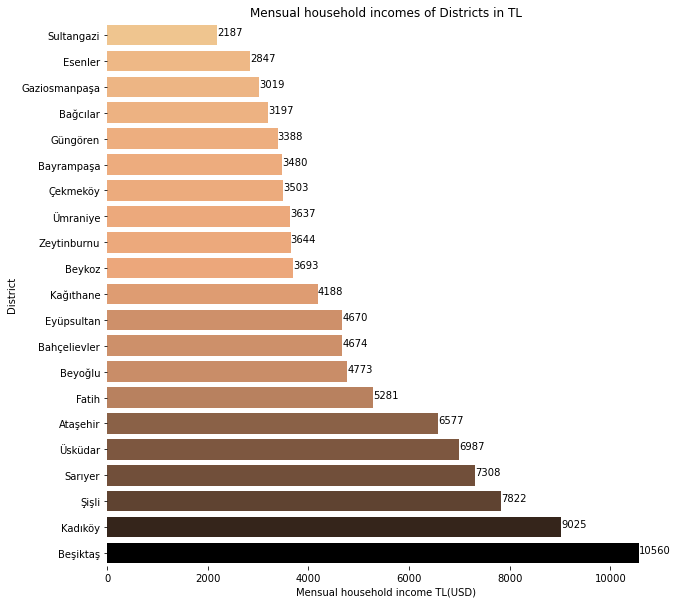

In [54]:
df_sorted = df.sort_values('Mensual household income TL(USD)', ascending = True, inplace = False)
df_sorted.reset_index(inplace=True)

f, ax = plt.subplots(figsize=(10, 10))

plt.title("Mensual household incomes of Districts in TL")
plt.ylabel("Districts")
plt.xlabel("Mensual household income TL")

norm = plt.Normalize(df_sorted["Mensual household income TL(USD)"].values.min(), df_sorted["Mensual household income TL(USD)"].values.max())
colors = plt.cm.copper_r(norm(df_sorted["Mensual household income TL(USD)"])) 

g = sns.barplot( x="Mensual household income TL(USD)", y="District", data=df_sorted, palette=colors)
sns.despine(left=True, bottom=True)

for index, row in df_sorted.iterrows():
    g.text(row['Mensual household income TL(USD)'] , index , row['Mensual household income TL(USD)'], color='black')
    

plt.show()

For better readability we will change the column names and put the cluster columns to the end.

In [55]:
df.rename({'Cluster Labels 2': 'Mensual_household_income_labels', 'Cluster Labels': 'Distance_to_IBM_labels'}, axis='columns', inplace = True)

In [56]:
cols = [col for col in df if (col != df.columns[0] and col != df.columns[1])] + [df.columns[1]] + [df.columns[0]]
df = df[cols]

In [57]:
df.head(1)

,District,Population,Area,Density,Mensual household income TL(USD),Annual household income TL(USD),Address,Location,Latitude,Longitude,Distance to IBM Turkey (km),Distance_to_IBM_labels,Mensual_household_income_labels
0,Kağıthane,"442,415",14.87,"29,752",4188,"50.260₺ (6,937$)","Kağıthane, Istanbul, Turkey","(Kağıthane, İstanbul, Marmara Bölgesi, Türkiye...",41.08598,28.972621,3.296599,1,3


So, for combining the results and further filter our candidate districts, lets look to the scatter plot below.

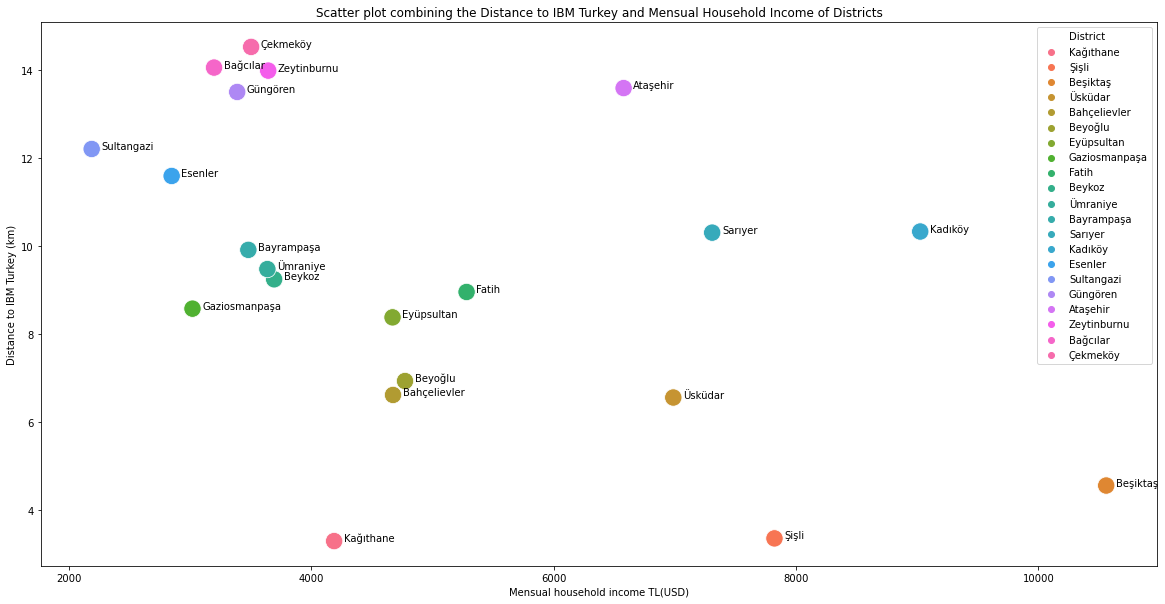

In [58]:
fig,ax = plt.subplots(figsize = (20,10))
sns.scatterplot(data=df, hue='District', x='Mensual household income TL(USD)', y='Distance to IBM Turkey (km)',s=300)
ax.set_title("Scatter plot combining the Distance to IBM Turkey and Mensual Household Income of Districts")
for x, y, z in zip(df['Mensual household income TL(USD)'], df['Distance to IBM Turkey (km)'], df['District']):
     plt.text(x = x + 80, 
     y = y, 
     s = z, 
     color = 'black') 
plt.show()

Now we can further filter our outputs. I like the lower left corner, you see we got districts which have distance less than 10 kms to IBM Turkey and have mensual household income less than 6000 TLs.

Let's filter our df.

In [59]:
df_filtered = df[df['Distance to IBM Turkey (km)'] < 10]

In [63]:
df_filtered = df_filtered[df_filtered['Mensual household income TL(USD)'] < 6000]

In [67]:
df_filtered.reset_index(inplace = True, drop = True)

In [106]:
df_filtered

,District,Population,Area,Density,Mensual household income TL(USD),Annual household income TL(USD),Address,Location,Latitude,Longitude,Distance to IBM Turkey (km),Distance_to_IBM_labels,Mensual_household_income_labels
0,Kağıthane,"442,415",14.87,"29,752",4188,"50.260₺ (6,937$)","Kağıthane, Istanbul, Turkey","(Kağıthane, İstanbul, Marmara Bölgesi, Türkiye...",41.085980,28.972621,3.296599,1,3
1,Bahçelievler,"592,371",16.62,"35,642",4674,"56.088₺ (7,741$)","Bahçelievler, Istanbul, Turkey","(Bahçelievler Mahallesi, Üsküdar, İstanbul, Ma...",41.053384,29.079710,6.613762,3,3
2,Beyoğlu,"226,396",8.91,"25,409",4773,"57.275₺ (7,905$)","Beyoğlu, Istanbul, Turkey","(Beyoğlu, İstanbul, Marmara Bölgesi, Türkiye, ...",41.028423,28.973681,6.929807,3,3
3,Eyüpsultan,"405,845",228.42,"1,777",4670,"56.044₺ (7,735$)","Eyüpsultan, Istanbul, Turkey","(Eyüpsultan, İstanbul, Marmara Bölgesi, Türkiy...",41.046044,28.925324,8.375188,0,3
4,Gaziosmanpaşa,"487,778",11.76,"41,478",3019,"36.228₺ (5,000$)","Gaziosmanpaşa, Istanbul, Turkey","(Gaziosmanpaşa, İstanbul, Marmara Bölgesi, Tür...",41.057526,28.915650,8.572748,0,4
5,Fatih,"396,594",15.59,"25,439",5281,"63.378₺ (8,747$)","Fatih, Istanbul, Turkey","(Fatih, İstanbul, Marmara Bölgesi, Türkiye, (4...",41.019297,28.947802,8.951256,0,3
6,Beykoz,"246,110",310.36,793,3693,"44.316₺ (6,116$)","Beykoz, Istanbul, Turkey","(Beykoz, İstanbul, Marmara Bölgesi, Türkiye, (...",41.123936,29.108315,9.238821,0,1
7,Ümraniye,"713,803",45.31,"15,754",3637,"43.641₺ (6,023$)","Ümraniye, Istanbul, Turkey","(Ümraniye, İstanbul, Marmara Bölgesi, Türkiye,...",41.022269,29.090073,9.471192,0,1
8,Bayrampaşa,"269,950",9.61,"28,091",3480,"41.762₺ (5,764$)","Bayrampaşa, Istanbul, Turkey","(Bayrampaşa, İstanbul, Marmara Bölgesi, Türkiy...",41.035738,28.912260,9.907260,0,1


We are left with 9 possible districts to live!

Let's now examine the foursquare data for those.

We get the developer API options and get_category_type function from foursquare project.

In [107]:
CLIENT_ID = 'CGPS5MHV1MHOYR3ZVCRJVU3ZXIEKV515XEGZ4LCVB2RTDWHW' # your Foursquare ID
CLIENT_SECRET = '02ONEV501CYBPZOKYVI1LDSRHYISDGLZQ4PHILRKY5SLX11Y' # your Foursquare Secret
ACCESS_TOKEN = 'XMYYZV2THMGTKQGJNRJACUB3MGAY22DWOP0MKIWLVBRGERSV' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CGPS5MHV1MHOYR3ZVCRJVU3ZXIEKV515XEGZ4LCVB2RTDWHW
CLIENT_SECRET:02ONEV501CYBPZOKYVI1LDSRHYISDGLZQ4PHILRKY5SLX11Y


In [108]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Let's explore trending venues around the latitute and longitude of this districts.

In [147]:
trending_venues_df_dict = dict()

In [148]:
df = df_filtered

In [149]:
for i in range(9):
    latitude = df.loc[i, 'Latitude']
    longitude = df.loc[i, 'Longitude']
    print("lat: ", latitude)
    print("long: ", longitude)
    
    url = 'https://api.foursquare.com/v2/venues/trending?client_id={}&client_secret={}&ll={},{}&v={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION)

    # send GET request and get trending venues
    results = requests.get(url).json()
    print("results: ", results)
    
    if len(results['response']['venues']) == 0:
        trending_venues_df = 'No trending venues are available at the moment!'
    else:
        trending_venues = results['response']['venues']
        trending_venues_df = json_normalize(trending_venues)
        
        # filter columns
        columns_filtered = ['name', 'categories'] + ['location.distance', 'location.city', 'location.postalCode', 'location.state', 'location.country', 'location.lat', 'location.lng']
        trending_venues_df = trending_venues_df.reindex(columns = columns_filtered)
        
        # filter the category for each row
        trending_venues_df['categories'] = trending_venues_df.apply(get_category_type, axis=1)
    trending_venues_df_dict[df.loc[i, 'District']] = trending_venues_df 
    """
        # filter columns
        columns_filtered = ['name', 'categories'] + ['location.distance', 'location.city', 'location.postalCode', 'location.state', 'location.country', 'location.lat', 'location.lng']
        trending_venues_df = trending_venues_df.reindex(columns = columns_filtered)

        
    # display trending venues

    """

lat:  41.08598
long:  28.9726208
results:  {'meta': {'code': 200, 'requestId': '607e8229fc6a4d727b198b2a'}, 'response': {'venues': [{'id': '4d5433532f638cfa1cb96b6a', 'name': 'İstanbul Adalet Sarayı', 'location': {'address': 'Merkez Mah. Abide-i Hürriyet Cad. No:223', 'lat': 41.06907418313581, 'lng': 28.980168223148162, 'distance': 1985, 'postalCode': '34384', 'cc': 'TR', 'city': 'Şişli', 'state': 'İstanbul', 'country': 'Türkiye', 'formattedAddress': ['Merkez Mah. Abide-i Hürriyet Cad. No:223', '34384 Şişli', 'Türkiye']}, 'categories': [{'id': '4bf58dd8d48988d12b941735', 'name': 'Courthouse', 'pluralName': 'Courthouses', 'shortName': 'Courthouse', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/government_courthouse_', 'suffix': '.png'}, 'primary': True}]}]}}
lat:  41.0533837
long:  29.0797099
results:  {'meta': {'code': 200, 'requestId': '607e8229a08a2a0b75ef6dd7'}, 'response': {'venues': []}}
lat:  41.0284233
long:  28.9736808
results:  {'meta': {'code': 200, 'req

Now we have a dictionary of districts, let's examine the trending venues in each.

# Kağıthane

In [151]:
trending_venues_df_dict['Kağıthane']

,name,categories,location.distance,location.city,location.postalCode,location.state,location.country,location.lat,location.lng
0,İstanbul Adalet Sarayı,Courthouse,1985,Şişli,34384,İstanbul,Türkiye,41.069074,28.980168


- Looks like Kağıthane only has its Courthouse and nothing more, I will eliminate this option since we are looking for a more sociable place to live.

# Bahçelievler

In [152]:
trending_venues_df_dict['Bahçelievler']

'No trending venues are available at the moment!'

- No trending venues means a no for us :)

 # Beyoğlu

In [153]:
trending_venues_df_dict['Beyoğlu']

,name,categories,location.distance,location.city,location.postalCode,location.state,location.country,location.lat,location.lng
0,Taksim Meydanı,Plaza,1383,Beyoğlu,34427,İstanbul,Türkiye,41.037296,28.985214
1,Galata Kulesi,Historic Site,311,Beyoğlu,34420,İstanbul,Türkiye,41.025641,28.974056
2,Cağaloğlu Hamamı,Bath House,1991,İstanbul,NaN,İstanbul,Türkiye,41.010590,28.975555
3,Mavi Bar,Bar,793,İstanbul,34445,İstanbul,Türkiye,41.034848,28.977767
4,Müşterek Meyhane,Meyhane,1078,İstanbul,NaN,İstanbul,Türkiye,41.036061,28.981580


- Beyoğlu seems nice, Taksim is a very popular area and there are lots of bars and restaurants there, moreover foursquare can also list a bar, a meyhane, a bath house and the famous Galata Kulesi.
- Beyoğlu can be a great option for us.

# Eyüpsultan

In [154]:
trending_venues_df_dict['Eyüpsultan']

,name,categories,location.distance,location.city,location.postalCode,location.state,location.country,location.lat,location.lng
0,Bayrampaşa,County,1988,NaN,NaN,İstanbul,Türkiye,41.041061,28.90258


- Looks like Eyüpsultan only has its County and nothing more, I will eliminate this option since we are looking for a more sociable place to live.

# Gaziosmanpaşa

In [155]:
trending_venues_df_dict['Gaziosmanpaşa']

,name,categories,location.distance,location.city,location.postalCode,location.state,location.country,location.lat,location.lng
0,Gaziosmanpaşa Meydanı,Plaza,1484,Gaziosmanpaşa,34240,İstanbul,Türkiye,41.069029,28.906697


- Gaziosmanpaşa also has just Gaziosmanpaşa square, which is dull in comparison with Taksim Square.

# Fatih

In [156]:
trending_venues_df_dict['Fatih']

,name,categories,location.distance,location.city,location.postalCode,location.state,location.country,location.lat,location.lng
0,Kapalıçarşı,Historic Site,1993,Fatih,NaN,İstanbul,Türkiye,41.010540,28.968501
1,Emniyet - Fatih Metro İstasyonu,Metro Station,750,İstanbul,34420,İstanbul,Türkiye,41.018336,28.938959
2,Aksaray Meydanı,Plaza,1017,Fatih,NaN,İstanbul,Türkiye,41.010158,28.947551
3,Fatih,County,97,NaN,NaN,İstanbul,Türkiye,41.018650,28.947022


- Fatih has Metro Station and Kapalıçarşı, they are also good options, but not really for socializing. Beyoğlu seems better in comparison with Fatih.

# Beykoz

In [157]:
trending_venues_df_dict['Beykoz']

,name,categories,location.distance,location.city,location.postalCode,location.state,location.country,location.lat,location.lng
0,Beykoz Sahili,Waterfront,1112,Beykoz,NaN,İstanbul,Türkiye,41.128755,29.096691


- Beykoz has Beykoz Beach which is also very famous, but this is not enough for our final decision.

# Ümraniye

In [158]:
trending_venues_df_dict['Ümraniye']

,name,categories,location.distance,location.city,location.postalCode,location.state,location.country,location.lat,location.lng
0,Ümraniye Çarşı,Other Great Outdoors,634,İstanbul,NaN,İstanbul,Türkiye,41.022879,29.097588
1,Ümraniye Film Stüdyoları,Multiplex,1679,NaN,NaN,NaN,Türkiye,41.025886,29.109483


- So, ümraniye has its down town and film studios, but still we need places to socialize.

# Bayrampaşa

In [159]:
trending_venues_df_dict['Bayrampaşa']

,name,categories,location.distance,location.city,location.postalCode,location.state,location.country,location.lat,location.lng
0,Bayrampaşa,County,1005,NaN,NaN,İstanbul,Türkiye,41.041061,28.902580
1,Büyük İstanbul Otogarı,Bus Station,1539,İstanbul,34030,İstanbul,Türkiye,41.040113,28.894873
2,Forum İstanbul,Shopping Mall,1825,Bayrampaşa,34045,İstanbul,Türkiye,41.045847,28.895146


- Bayrampaşa has a mall, and bus terminal, not really attractive.

We try to pick the optimal district to live if we were to work in IBM Istanbul, we looked at distance to IBM Turkey, Mensual household incomes and Foursquare data for exploring trending venues.

# According to our findings, I think we should play on Beyoğlu

Since the Foursquare data is not the reality we can not say that this is the best choice, and also we did not take into acount the transportation ways from the districts to IBM Turkey.

However, this effor can be a starting point so that we can analyze the districts further and come to a satisfying decision.